<a href="https://colab.research.google.com/github/PRETTYMARTHA/Prediction-of-product-sales/blob/main/Copy_of_Copy_of_Headers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of Product Sales

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import missingno as msno
fpath="/content/drive/MyDrive/Week2_data/sales_predictions_2023.csv"
df_prediction=pd.read_csv(fpath)
df_prediction

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


o- Author: Martha Nairuba

In [ ]:
df_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
df_prediction.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Project Overview

## Load and Inspect Data

## Clean Data

In [ ]:
df_prediction.shape

(8523, 12)

In [ ]:
df_prediction.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [ ]:
df_prediction.duplicated(keep=False).sum()

0

In [ ]:
df_prediction.duplicated(keep=False).value_counts()

False    8523
dtype: int64

In [ ]:
df_prediction.isna().value_counts(dropna=False)

Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  Outlet_Size  Outlet_Location_Type  Outlet_Type  Item_Outlet_Sales
False            False        False             False            False      False     False              False                      False        False                 False        False                4650
                                                                                                                                    True         False                 False        False                2410
                 True         False             False            False      False     False              False                      False        False                 False        False                1463
dtype: int64

In [ ]:
df_prediction.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

<Axes: >

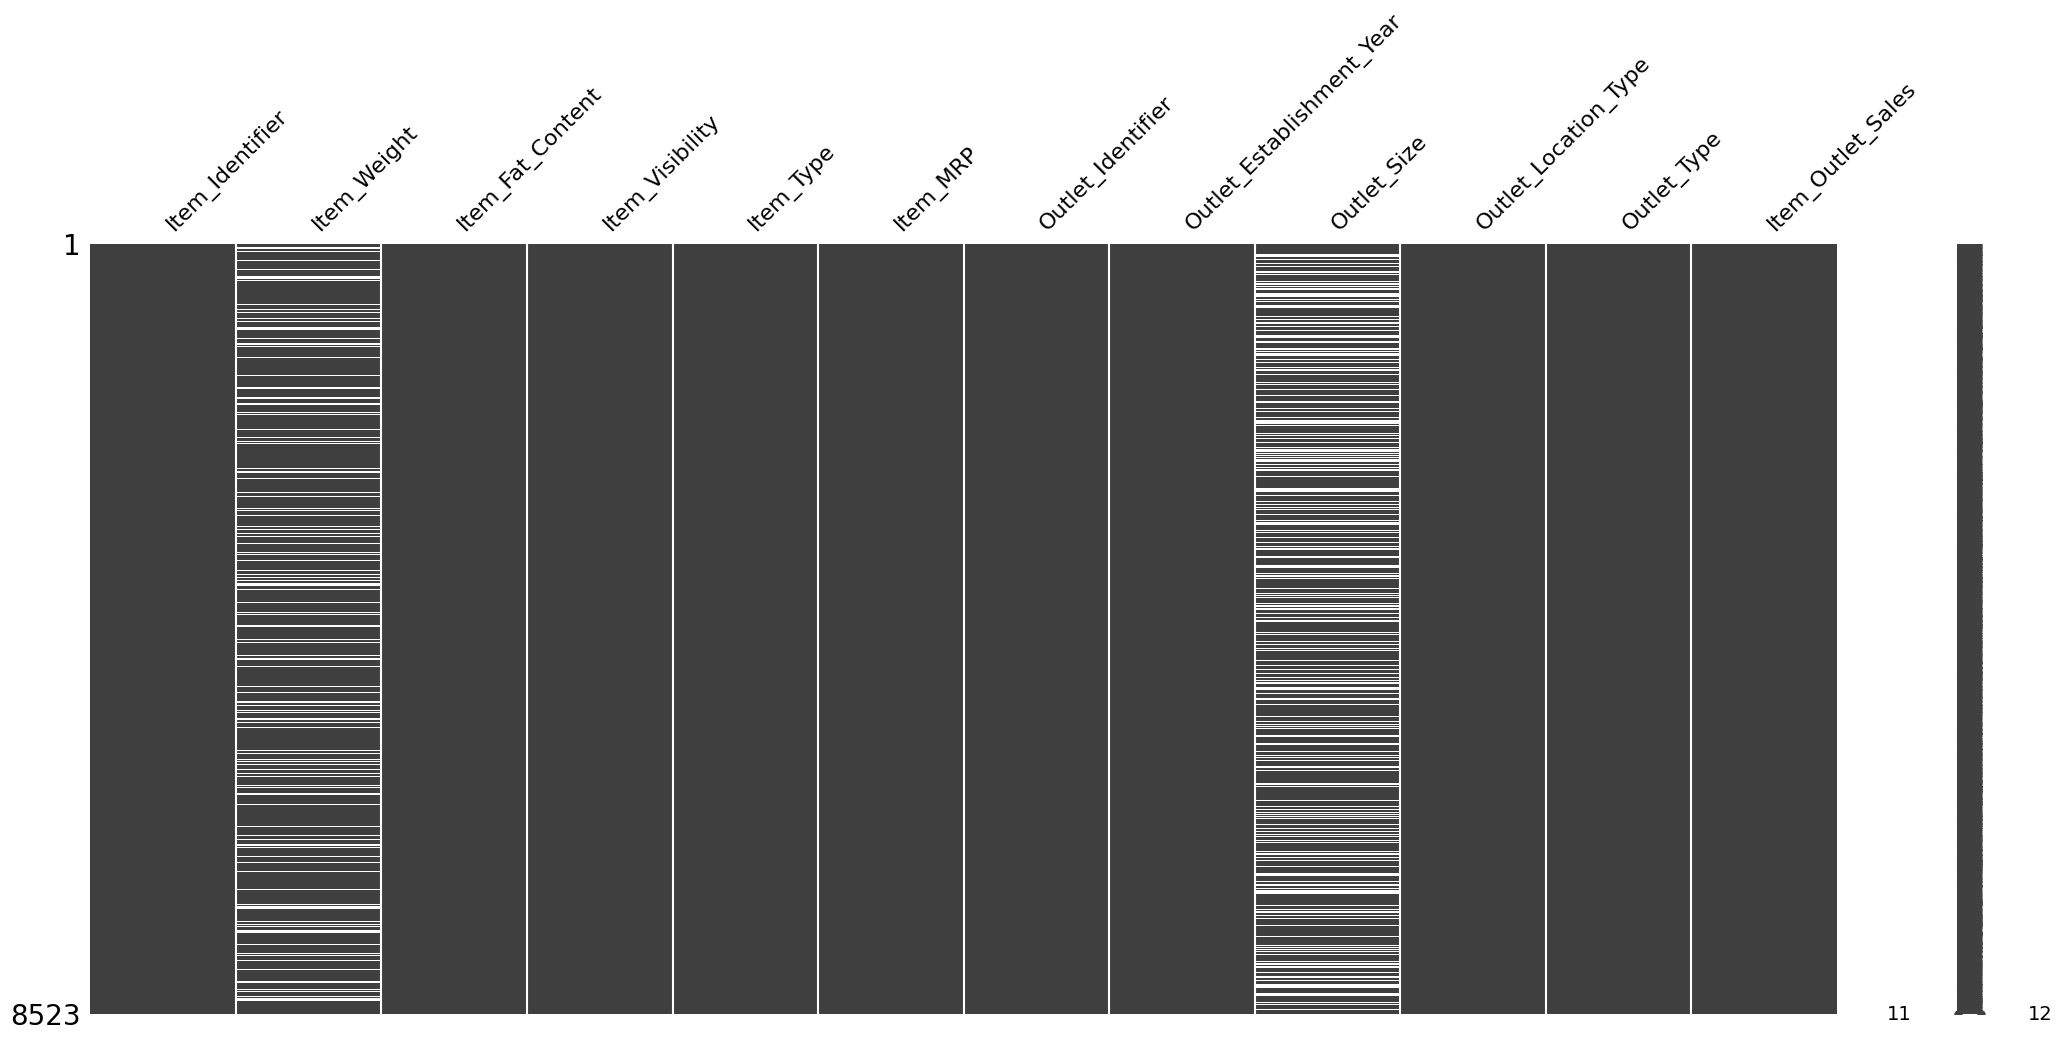

In [ ]:
msno.matrix(df_prediction)

In [ ]:
df_prediction[['Item_Weight','Outlet_Size']].dtypes

Item_Weight    float64
Outlet_Size     object
dtype: object

In [ ]:
df_prediction['Outlet_Size'].fillna('MISSING',inplace=True)

In [ ]:
df_prediction.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

<Axes: >

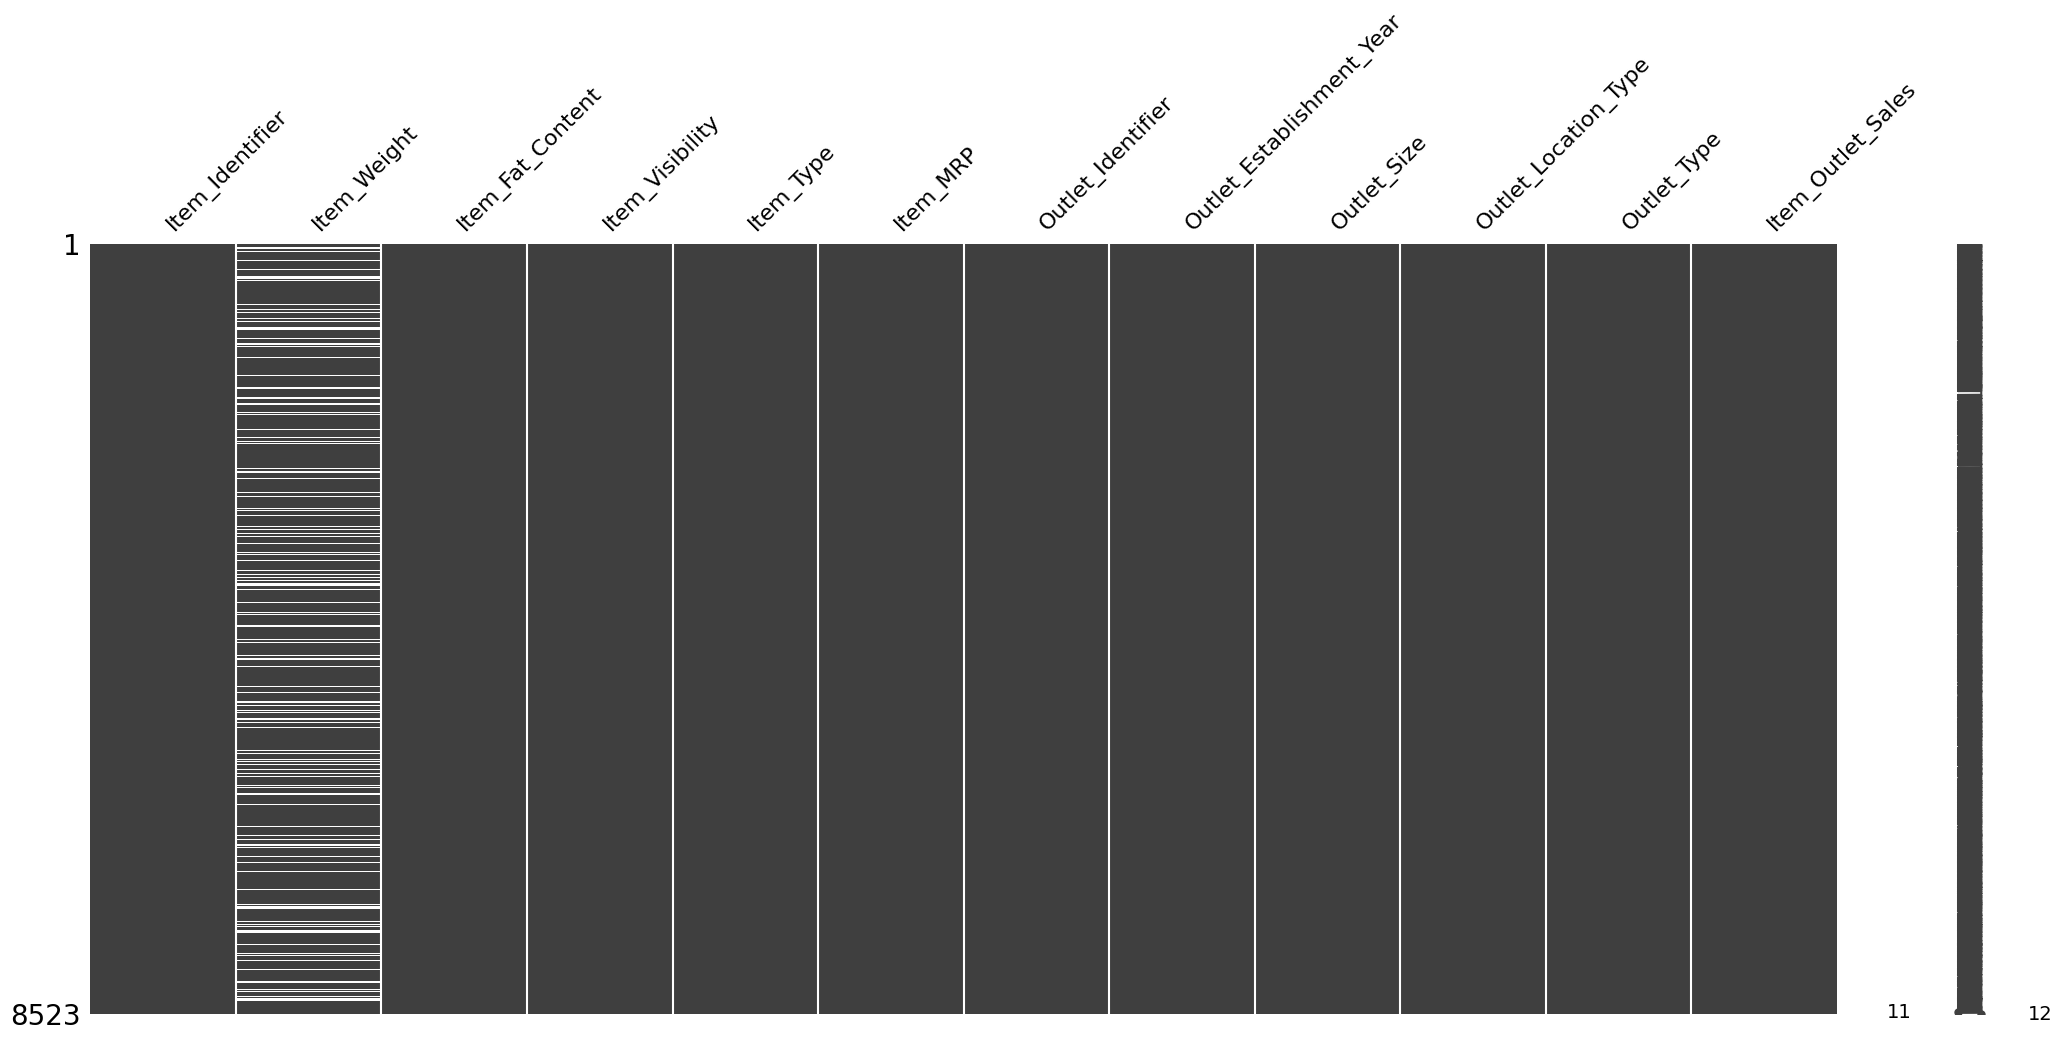

In [ ]:
msno.matrix(df_prediction)

In [ ]:
df_prediction['Item_Weight'].fillna(999,inplace=True)

<Axes: >

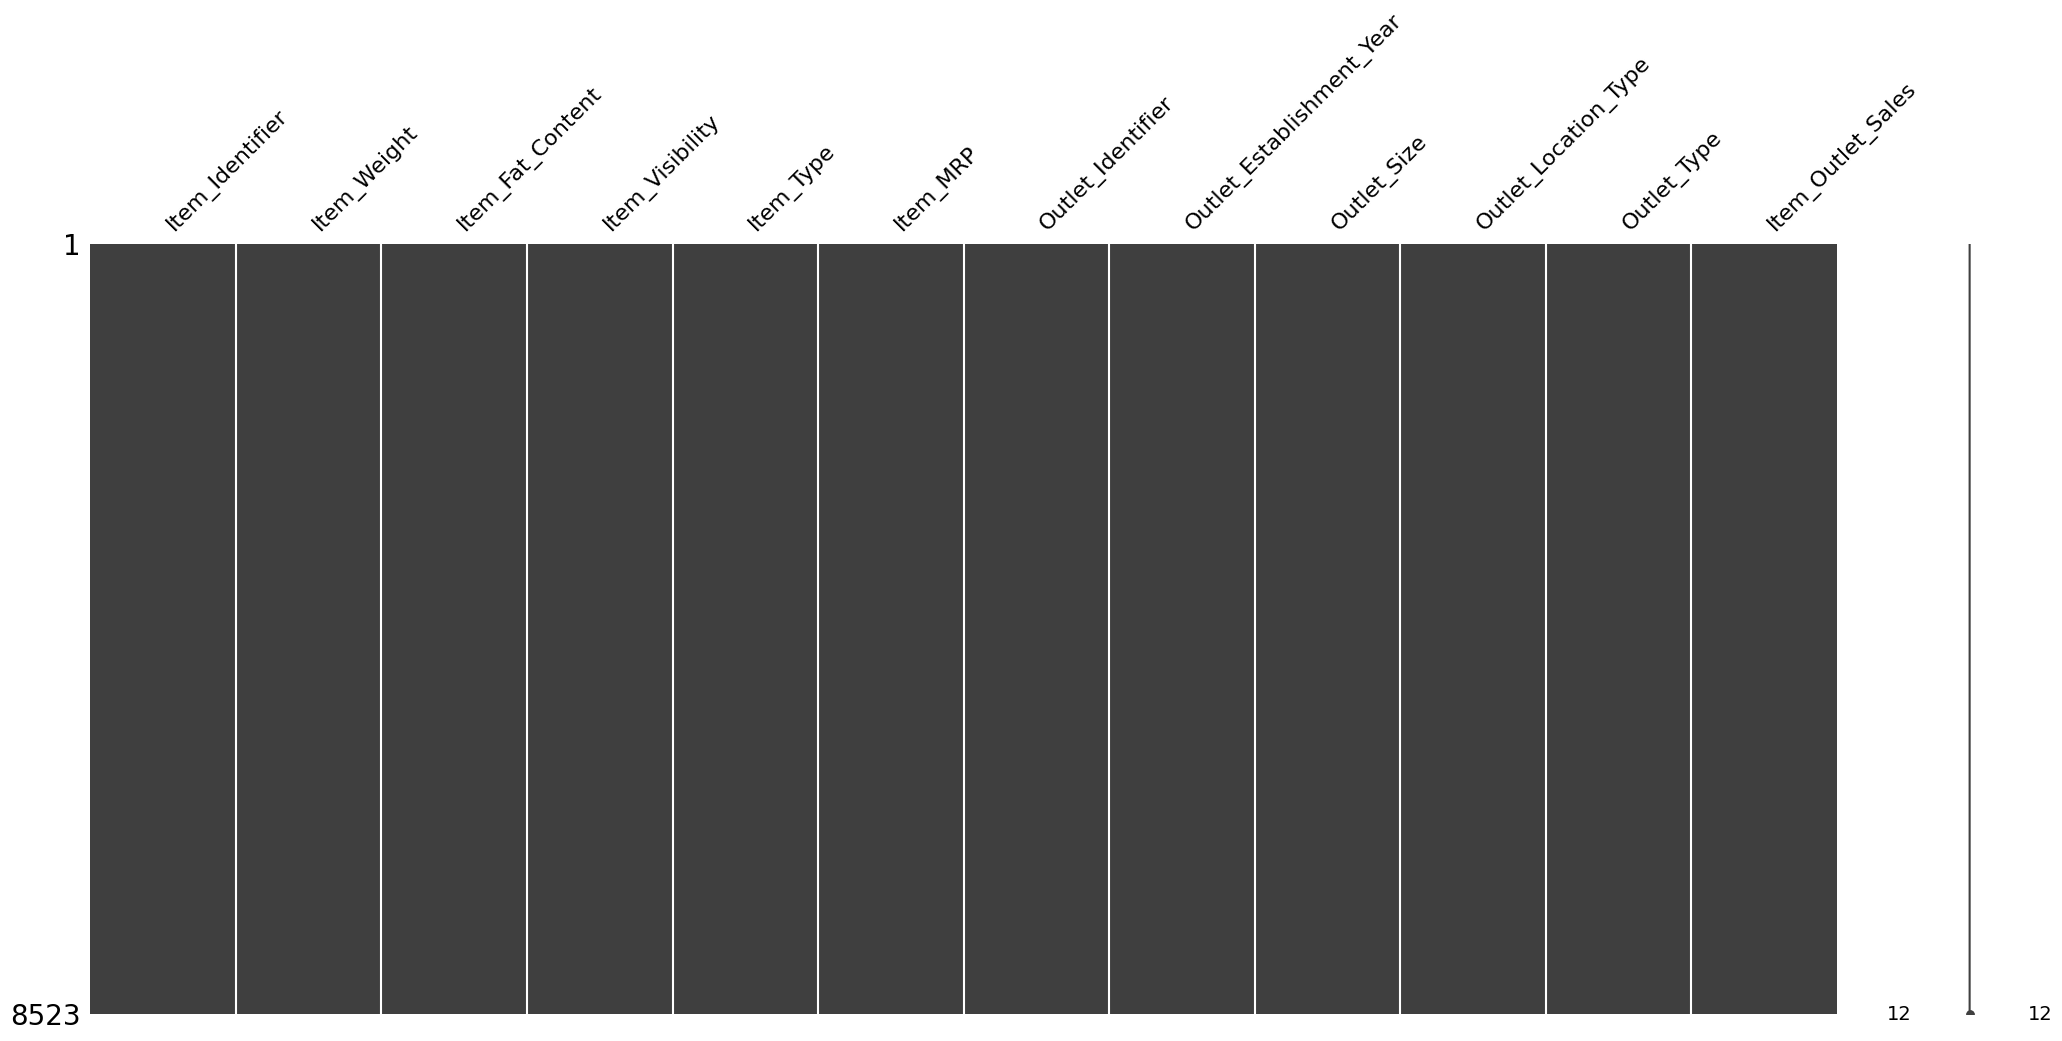

In [ ]:
msno.matrix(df_prediction)

In [ ]:
obj_prediction_col=df_prediction.select_dtypes("object").columns
obj_prediction_col

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [ ]:
for item in obj_prediction_col:
  print(f'{item}column')
  print(f'{df_prediction[item].value_counts(dropna=False)}')
  print('\n')

Item_Identifiercolumn
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64


Item_Fat_Contentcolumn
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


Item_Typecolumn
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


Outlet_Identifiercolumn
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OU

In [ ]:
df_prediction["Item_Fat_Content"].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [ ]:
df_prediction['Item_Fat_Content'].replace({'LF':"Low Fat",'low fat':"Low Fat",'reg':"Regular"},inplace=True)

In [ ]:
df_prediction["Item_Fat_Content"].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [ ]:
df_prediction.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,182.132110,0.066132,140.992782,1997.831867,2181.288914
std,371.899127,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,14.500000,0.053931,143.012800,1999.000000,1794.331000
75%,19.500000,0.094585,185.643700,2004.000000,3101.296400
max,999.000000,0.328391,266.888400,2009.000000,13086.964800


## Exploratory Data Analysis

In [ ]:
#importing visualization packages
import seaborn as sns
import matplotlib.pyplot as plt

# Visualization

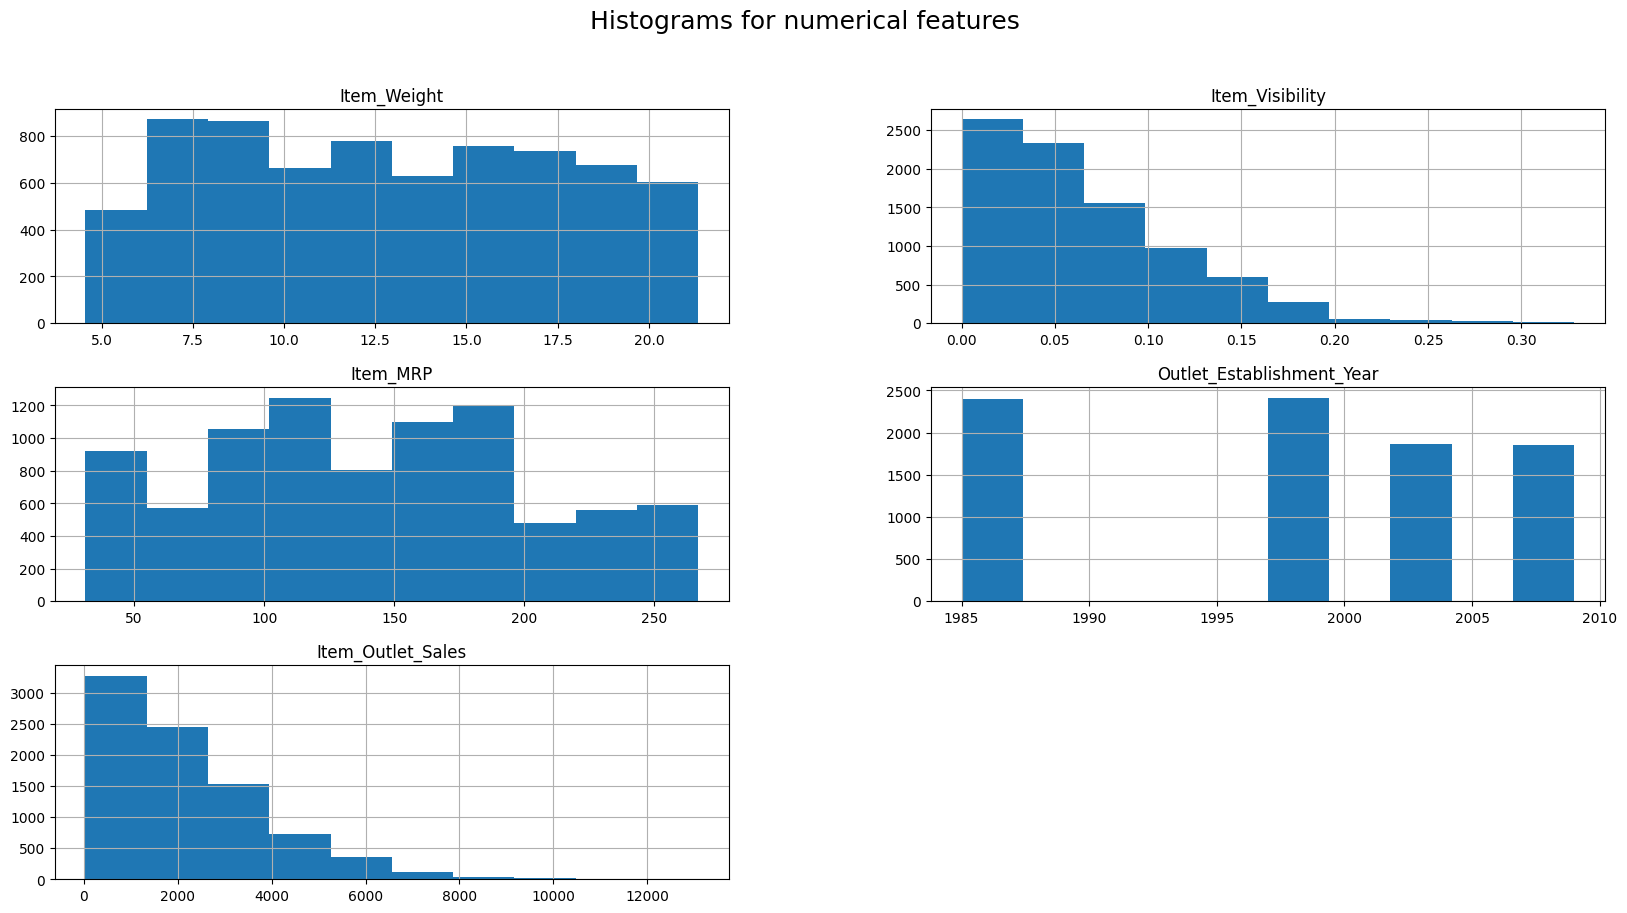

In [ ]:
#Histograms viewing the distribution of numeric features in the dataset
numerical_features=df_prediction.select_dtypes('number').columns

df_prediction[numerical_features].hist(bins=10,figsize=(20,10))
plt.suptitle('Histograms for numerical features',fontsize=18)
plt.show();


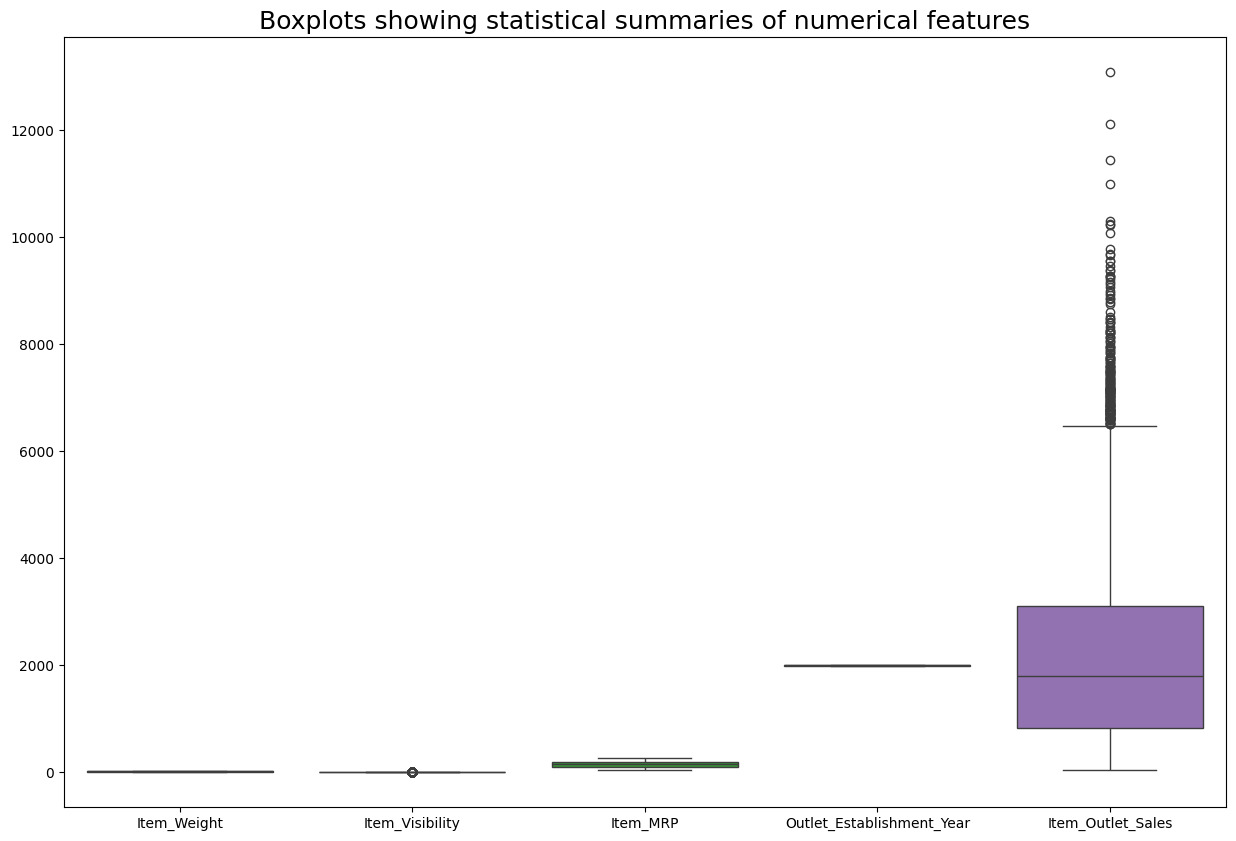

In [ ]:
#Boxplots viewing statistical summaries of numerical features in the dataset
plt.figure(figsize=(15,10))
sns.boxplot(data=df_prediction[numerical_features])
plt.title('Boxplots showing statistical summaries of numerical features',fontsize=18)
plt.show();

In [ ]:
#Countplot viewing the frequency of each class of categorical features in the dataset
categorical_features=df_prediction.select_dtypes('object').columns

def count_plot(cate):
  plt.figure(figsize=(15,10))
  plt.title(f'countplot of{cate}feature',fontsize=18)
  sns.countplot(data=df_prediction,x=cate)
  plt.xticks(rotation=45)
  plt.xlabel(item.upper())
  plt.show();

  for item in categorical_features:
    count_plot(item)
    print('\n')

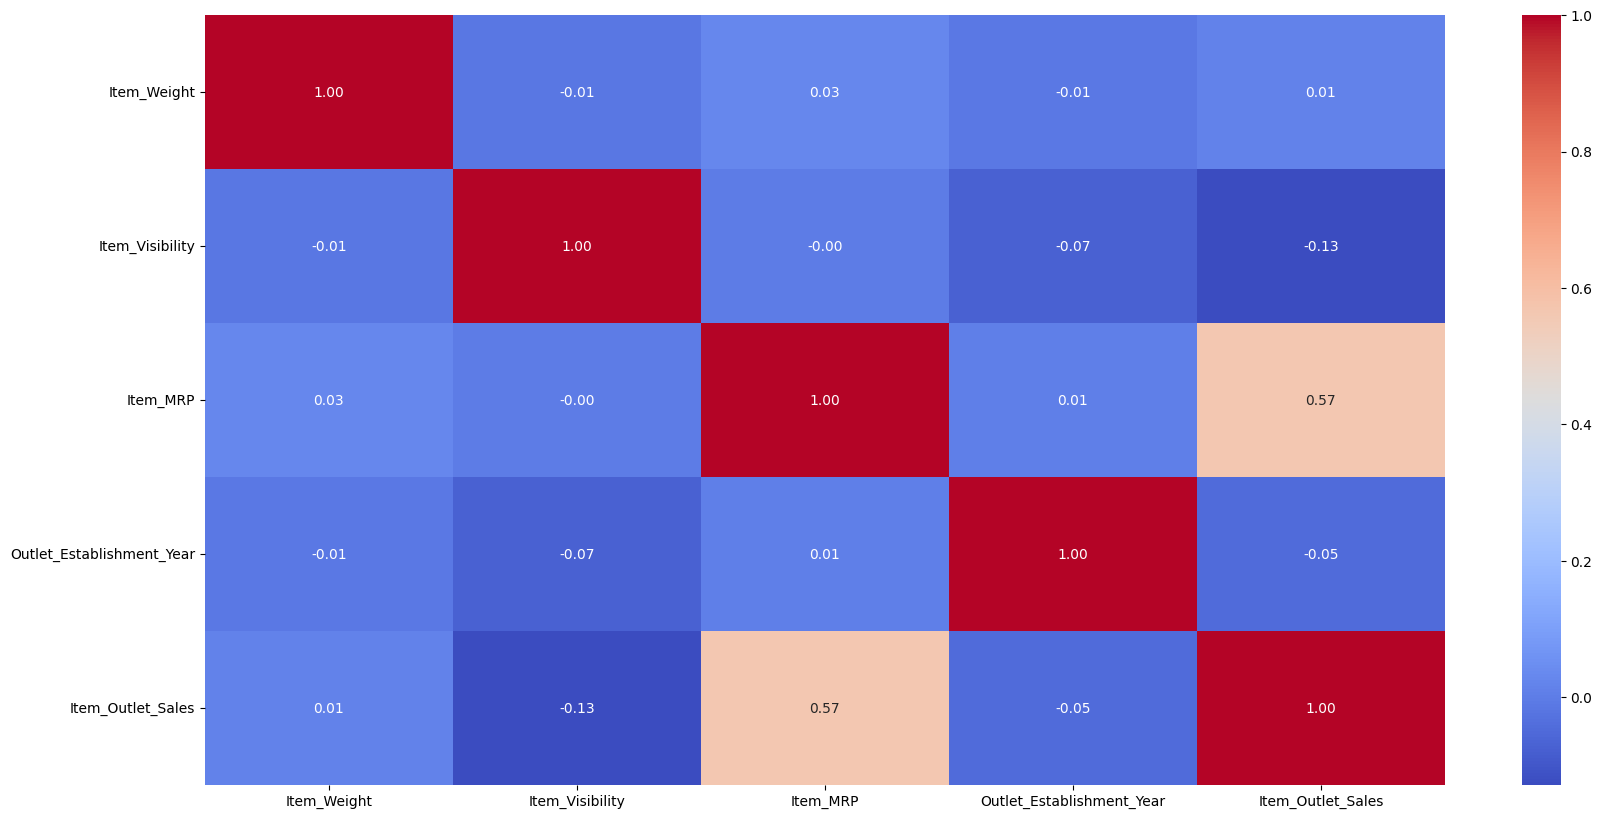

In [ ]:
#Heatmap viewing the correlation between features
plt.figure(figsize=(20,10))
corr=df_prediction.corr(numeric_only=True)
sns.heatmap(data=corr,annot=True,cmap='coolwarm',fmt='.2f')
plt.show();

## Feature Inspection